Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


C:\Users\Shehryar\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>
(1, 784)
Tensor("Reshape_1:0", shape=(1, 28, 28, 1), dtype=float32)


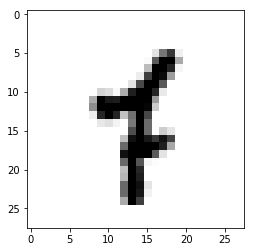

Epoch 0, training accuracy 0.14
Epoch 100, training accuracy 0.96
Epoch 200, training accuracy 1
Epoch 300, training accuracy 0.96
Epoch 400, training accuracy 0.92
Epoch 500, training accuracy 1
Epoch 600, training accuracy 0.98
Epoch 700, training accuracy 0.96
Epoch 800, training accuracy 1
Epoch 900, training accuracy 0.94
Test Accuracy: 0.98089998960495


In [2]:

import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline



from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


tf.reset_default_graph() 
sess = tf.InteractiveSession()
x = tf.placeholder("float", shape = [None, 28,28,1]) 
y_ = tf.placeholder("float", shape = [None, 10]) 


W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(.1, shape = [32])) 



print (x)
print (W_conv1)
h_conv1 = tf.nn.conv2d(input=x, filter=W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
h_conv1 = tf.nn.relu(h_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


def conv2d(x, W):
  return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')




W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(.1, shape = [64]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(.1, shape = [1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(.1, shape = [10]))


y = tf.matmul(h_fc1_drop, W_fc2) + b_fc2



crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))


trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)


correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


sess.run(tf.global_variables_initializer())


b = mnist.train.next_batch(1)
print (b[0].shape) 
image = tf.reshape(b[0], [-1,28,28,1])
print (image)
my_img = image.eval() 
my_i = my_img.squeeze()
plt.imshow(my_i, cmap='gray_r')
plt.show()


batchSize = 50
for i in range(1000):
    batch = mnist.train.next_batch(batchSize)
    trainingInputs = batch[0].reshape([batchSize,28,28,1])
    trainingLabels = batch[1]
    if i%100 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={x:trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        print ("Epoch %d, training accuracy %g"%(i, trainAccuracy))
    trainStep.run(session=sess, feed_dict={x: trainingInputs, y_: trainingLabels, keep_prob: 0.5})
    

testInputs = mnist.test.images.reshape([-1, 28, 28, 1])
testLabels = mnist.test.labels
acc = accuracy.eval(feed_dict = {x: testInputs, y_: testLabels, keep_prob: 1.0})
print("Test Accuracy: {}".format(acc))
